## PyAudioAnalysis Test Script

### Import Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, json

C:\Users\anfrankl\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
from pyAudioAnalysis import audioTrainTest as aT

### Note: may need to update multiple packages
- pydub
- eyed3
- ffmpeg

### Sample Feature Extraction

In [3]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures

In [4]:
from pyAudioAnalysis import MidTermFeatures

In [5]:
[Fs, x] = audioBasicIO.read_audio_file(".\pyAudioAnalysis\data\doremi.wav")

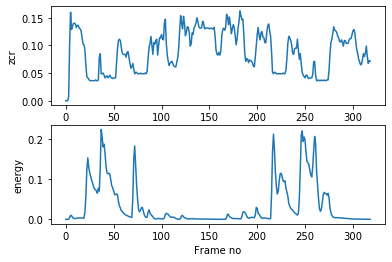

In [6]:
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [7]:
x_array, short_feat, mid_feat = MidTermFeatures.mid_feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs,0.050*Fs, 0.025*Fs)
# plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
# plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [8]:
x_array.shape

(136, 319)

### Speech Diarization Example

 """
    ARGUMENTS:
        - filename:        the name of the WAV file to be analyzed
        - n_speakers       the number of speakers (clusters) in
                           the recording (<=0 for unknown)
        - mt_size (opt)    mid-term window size
        - mt_step (opt)    mid-term window step
        - st_win  (opt)    short-term window size
        - lda_dim (opt     LDA dimension (0 for no LDA)
        - plot_res         (opt)   0 for not plotting the results 1 for plotting
    """

In [8]:
from pyAudioAnalysis import audioSegmentation as aS

C:\Users\anfrankl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 5 - 1) = 4 components.
  ChangedBehaviorWarning)
C:\Users\anfrankl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


64.8	64.3


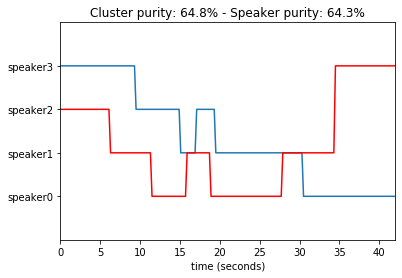

In [42]:
cls = aS.speakerDiarization("./pyAudioAnalysis/data/diarizationExample.wav",n_speakers=4,plot_res=1)

In [43]:
cls

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

C:\Users\anfrankl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
C:\Users\anfrankl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


67.9	79.5


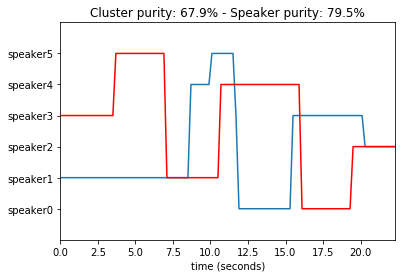

In [44]:
cls2 = aS.speakerDiarization("./pyAudioAnalysis/data/diarizationExample2.wav",n_speakers=6,plot_res=1)

In [45]:
cls2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 5., 5., 5., 5., 5., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

## Convert Greenway Sample file from MP3 to WAV file

In [4]:
from pyAudioAnalysis import audioBasicIO as aB

#### Find sampling rate

In [5]:
sampling_rate, signal = aB.read_audio_generic("./pyAudioAnalysis/data/Greenway/Conversation.wav")

In [6]:
sampling_rate

16000

C:\Users\anfrankl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 61 - 1) = 26 components.
  ChangedBehaviorWarning)
C:\Users\anfrankl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


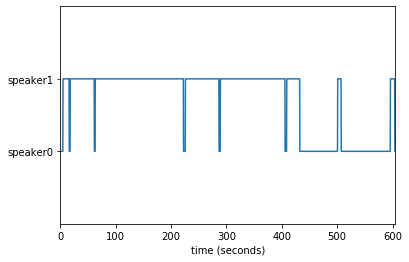

In [9]:
cls_gw = aS.speakerDiarization("./pyAudioAnalysis/data/Greenway/Conversation.wav",n_speakers=2,plot_res=1)

#### Greenway Diarization Functions

In [10]:
from GreenwayHealth import dirGreenwaySpeakerDiarization,fileGreenwaySpeakerDiarization

In [13]:
dirGreenwaySpeakerDiarization(audio_folder=".\\pyAudioAnalysis\\data\\Greenway\\")